In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
drive_path = '/content/drive/MyDrive/IIA_UP/hoctavo/aprendizaje_de_maquina_ii/nature-person-face/datasets/face-segmentation'

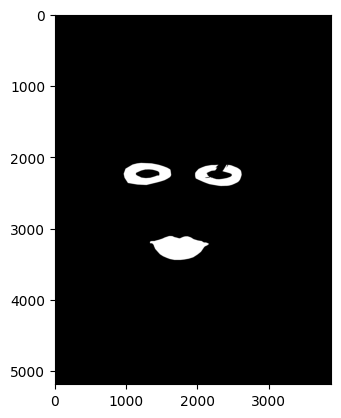

In [8]:
# img, mask = data[2]

img = Image.open(drive_path + '/masks/060004_4_028452_MALE_31.png')
img = np.asarray(img)
# print('img.shape: ', img.shape)
# print('img: ', img)
# print('img.flatten: ', np.unique(img.reshape(-1, img.shape[2]), axis=0))
# print('img.shape: ', img.permute(1, 2, 0).shape)
plt.imshow(img)
# target_color = [121, 112, 131]
# fc_mask = np.all(mask == target_color)
# plt.imshow(fc_mask)

CLASS_AROUND_EYES = [  1,  79, 151]
CLASS_NOSE_HOLES = [ 96,  96,  96]
CLASS_HAIR = [105,  67, 116]
CLASS_EARS = [113, 172,  66]
CLASS_EYEBROWS = [128, 128,   0]
CLASS_CUELLO = [146,  91,  11]
CLASS_SKIN = [212, 198, 169]
CLASS_LIPS = [241, 140, 184]
CLASS_CLOTHES = [255,  81,  46]
CLASS_BACKGROUND = [255, 255, 255]

target_color = CLASS_LIPS
mask = np.all(np.logical_or(img == target_color, img == CLASS_AROUND_EYES), axis=2)
# false_mask = ~mask
# fc = np.full_like(img, [255, 255, 255])
# fc[mask, :] = [0, 0, 0]
# plt.imshow(mask, cmap='gray')

# reduce classes
# fc_img = np.where(img == CLASS_SKIN or img == CLASS_CUELLO, CLASS_SKIN, img)
fc_img = np.where(np.logical_or(img == CLASS_SKIN, img == CLASS_CUELLO), CLASS_SKIN, img)
plt.imshow(mask, cmap='gray')

# reduce classes
# fc_img = np.where(img == RGB1 or img == RGB2, '', img)
# fc = np.where(img.all() == CLASS_HAIR or img.all() == CLASS_SKIN, '', img)

# # plot
# plt.figure()

# plt.subplot(1, 3, 1)
# # plt.imshow(img.permute(1, 2, 0))
# plt.imshow(img)
# plt.title('Original image')

# plt.subplot(1, 3, 2)
# plt.imshow(mask)
# plt.title('Mask')

# plt.subplot(1, 3, 3)
# plt.imshow(fc)
# plt.title('Other')

Text(0.5, 1.0, 'Result')

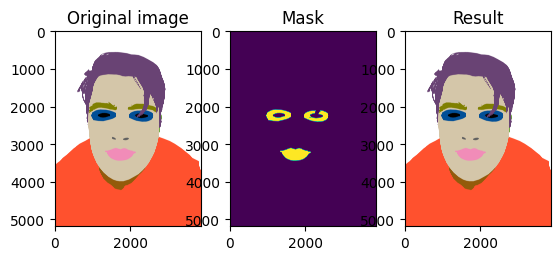

In [9]:
# img, mask = data[2]

original_img = Image.open(drive_path + '/img/060004_4_028452_MALE_31.jpg')
original_img = np.asarray(original_img)

img = Image.open(drive_path + '/masks/060004_4_028452_MALE_31.png')
img = np.asarray(img)

CLASS_AROUND_EYES = [  1,  79, 151]
CLASS_NOSE_HOLES = [ 96,  96,  96]
CLASS_HAIR = [105,  67, 116]
# CLASS_ = [113, 172,  66]
CLASS_EYEBROWS = [128, 128,   0]
CLASS_CUELLO = [146,  91,  11]
CLASS_SKIN = [212, 198, 169]
CLASS_LIPS = [241, 140, 184]
CLASS_CLOTHES = [255,  81,  46]
CLASS_BACKGROUND = [255, 255, 255]

target_color = CLASS_LIPS
mask = np.all(np.logical_or(img == target_color, img == CLASS_AROUND_EYES), axis=2)

result = img
result[mask==255] = img[mask==255]




# plot
plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(result)
plt.title('Result')

Text(0.5, 1.0, 'Result')

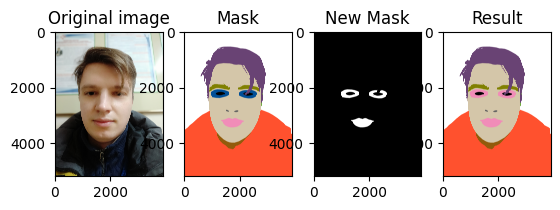

In [10]:
import cv2

room = cv2.imread(drive_path + '/img/060004_4_028452_MALE_31.jpg')
logo = cv2.imread(drive_path + '/masks/060004_4_028452_MALE_31.png')

# change to color
room = cv2.cvtColor(room, cv2.COLOR_BGR2RGB)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

#--- Resizing the logo to the shape of room image ---
# logo = cv2.resize(logo, (room.shape[1], room.shape[0]))

#--- Apply Otsu threshold to blue channel of the logo image ---
# ret, logo_mask = cv2.threshold(logo[:,:,0], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# cv2.imshow('logo_mask', logo_mask)
logo_mask = np.all(np.logical_or(img == target_color, img == CLASS_AROUND_EYES), axis=2)
# logo_mask = Image.open(drive_path + '/masks/060004_4_028452_MALE_31.png').convert('L')
# plt.imshow(logo_mask)

room2 = room.copy()
logo2 = logo.copy()

# print('logo_mask\n', logo_mask)
#--- Copy pixel values of logo image to room image wherever the mask is white ---
# room2[np.where(logo_mask == True)] = logo[np.where(logo_mask == True)]
room2[np.where(logo_mask == True)] = [255, 255, 255]
logo2[np.where(logo_mask == True)] = target_color
# print(logo[np.where(logo_mask == True)])
# plt.imshow(room2)



# plot
plt.figure()

plt.subplot(1, 4, 1)
plt.imshow(room)
plt.title('Original image')

plt.subplot(1, 4, 2)
plt.imshow(logo, cmap='gray')
plt.title('Mask')

plt.subplot(1, 4, 3)
plt.imshow(logo_mask, cmap='gray')
plt.title('New Mask')

plt.subplot(1, 4, 4)
plt.imshow(logo2)
plt.title('Result')

Text(0.5, 1.0, 'Image with mask')

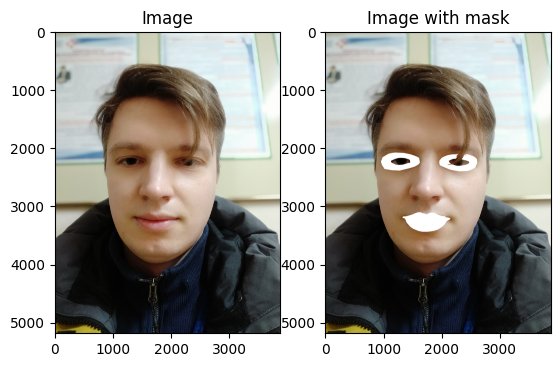

In [11]:
import cv2

room = cv2.imread(drive_path + '/img/060004_4_028452_MALE_31.jpg')
logo = cv2.imread(drive_path + '/masks/060004_4_028452_MALE_31.png')

# change to color
room = cv2.cvtColor(room, cv2.COLOR_BGR2RGB)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

#--- Resizing the logo to the shape of room image ---
# logo = cv2.resize(logo, (room.shape[1], room.shape[0]))

#--- Apply Otsu threshold to blue channel of the logo image ---
# ret, logo_mask = cv2.threshold(logo[:,:,0], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# cv2.imshow('logo_mask', logo_mask)
logo_mask = np.all(np.logical_or(img == target_color, img == CLASS_AROUND_EYES), axis=2)
# logo_mask = Image.open(drive_path + '/masks/060004_4_028452_MALE_31.png').convert('L')
# plt.imshow(logo_mask)

room2 = room.copy()
logo2 = logo.copy()

# print('logo_mask\n', logo_mask)
#--- Copy pixel values of logo image to room image wherever the mask is white ---
# room2[np.where(logo_mask == True)] = logo[np.where(logo_mask == True)]
room2[np.where(logo_mask == True)] = [255, 255, 255]
logo2[np.where(logo_mask == True)] = target_color
# print(logo[np.where(logo_mask == True)])
# plt.imshow(room2)



# plot
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(room)
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(room2, cmap='gray')
plt.title('Image with mask')